# Toxic Comments Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-07-11 17:17:53.396192: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train.isnull().any() # checking for nulls


id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
dtype: bool

In [5]:
test.isnull().any()# checking for nulls

id              False
comment_text    False
dtype: bool

In [6]:
row_list = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[row_list].values
list_sentences_train = train["comment_text"]
list_sentences_test = test["comment_text"]

In [7]:
# Tokenize the comments
max_features = 50000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [8]:
# pad and trim the toknized list
maxlen = 200 # make the max length 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [9]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

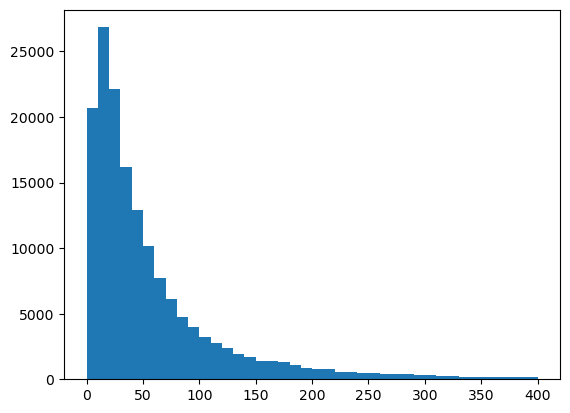

In [10]:

plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.show()

In [11]:
# pad and trim the toknized list
maxlen = 200 # make the max length 100 based on the graph above
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [12]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation

In [13]:
inp = Input(shape=(maxlen, )) #maxlen=100 as defined earlier

In [16]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [17]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)

In [18]:
from keras.layers import GlobalMaxPool1D # reduce dimisionality from 3 to 2
x = GlobalMaxPool1D()(x)

In [19]:
x = Dropout(0.1)(x) #drop 10% of nodes

In [20]:
x = Dense(50, activation="relu")(x)

In [21]:
x = Dropout(0.1)(x)#drop 10% of nodes

In [22]:
x = Dense(6, activation="sigmoid")(x)

In [24]:
from keras.models import Model
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [27]:
batch_size = 64
epochs = 4
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/4
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 378s 168ms/step - accuracy: 0.9622 - loss: 0.0707 - val_accuracy: 0.9939 - val_loss: 0.0490
Epoch 2/4
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 374s 167ms/step - accuracy: 0.9906 - loss: 0.0444 - val_accuracy: 0.9933 - val_loss: 0.0483
Epoch 3/4
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 380s 169ms/step - accuracy: 0.9817 - loss: 0.0374 - val_accuracy: 0.9929 - val_loss: 0.0489
Epoch 4/4
2244/2244 ━━━━━━━━━━━━━━━━━━━━ 380s 169ms/step - accuracy: 0.9270 - loss: 0.0322 - val_accuracy: 0.9926 - val_loss: 0.0508


In [28]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 128)       │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer (LSTM)               │ (None, 200, 60)        │        45,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 60)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │         3,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,346,150 (73.80 MB)

 Trainable params: 6,448,716 (24.60 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,897,434 (49.20 MB)